# KNN
'Dime con quien andas y te dire quien eres'

In [1]:
%matplotlib inline

import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
from sklearn.preprocessing import LabelEncoder

import utils

sns.set(color_codes=True)
sns.set_context("notebook", font_scale=1)
plt.rcParams['figure.figsize'] = (17, 5)

In [2]:
tracks = pd.read_pickle("clean_data/track.pkl")
tracks.sample(3)

,date_created,duration,genre_top,title,album,album_tracks,artist,location,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,,,,,,,,,,,,,,,,
21008,2009-11-13 13:13:37,189,Electronic,That is the way the cookie crumbles,Ornitorrinco Voador,11,Retrigger,Brazil,0.033500,0.339229,0.566492,0.886600,0.419389,0.329924,236.470,0.738205
16379,2009-07-10 08:02:30,140,Old-Time / Historic,Coax Me,Antique Phonograph Music Program 08/26/2008,22,Arthur Collins and Byron G. Harlan,NaN,0.995796,0.406637,0.311468,0.971264,0.543810,0.663865,161.324,0.636104
10184,2009-04-08 16:08:49,223,Rock,All My Joke Suicide,Ghost Treat Magic,3,Neowax,"Bandung, Indonesia",0.000361,0.393143,0.842147,0.625490,0.074506,0.049383,140.124,0.338577


In [3]:
features = pd.read_pickle("clean_data/features.pkl")
features.sample(3)

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
33337        -0.401243  1.010396 -0.058496  0.233354  0.287784  0.694219   
1435         -0.383794 -0.378448 -0.525276 -0.068779  0.555434  1.578388   
26327        -0.986769 -1.189512 -0.939986 -1.049207  0.137487 -0.493282   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
33337       0.103016 -0.811767  0.261125  0.327849  ...  0.112677  0.018699   
1435        0.508475  0.659993  1.841271  2.662292  ...  0.048606  0.014757   
26327      -0.966243 -0.594881 -1.347585 -0.704133  ...  0.108462  0.024966   

feature                      zcr                                          \
statistics              kurtosis       max      mean    median       min   
number            06          01        01        01        01        01   
track_id                                                                   
33337       0.021692   16.739273  0.339355  0.048728  0.044922  0.000000   
1435        0.016237    0.351823  0.646973  0.309288  0.318848  0.005859   
26327       0.027682  103.284843  0.378906  0.025052  0.021973  0.000000   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
33337       2.718249  0.026302  
1435       -0.259071  0.103229  
26327       7.591215  0.020997  

[3 rows x 518 columns]

In [4]:
features['mfcc']['std']

number,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20
track_id,,,,,,,,,,,,,,,,,,,,
2,97.809044,38.569584,22.576273,20.767921,19.869740,20.299164,14.631481,12.183411,9.399827,10.742301,10.059609,8.601942,9.284250,9.245516,8.520863,8.560472,7.651871,7.246555,7.077188,7.391859
3,111.686371,41.191982,19.406340,22.025253,19.330267,19.175596,12.421652,10.261386,9.386757,10.165544,8.771966,10.026867,6.978541,7.650417,9.600357,7.222888,8.398293,7.285423,7.417791,8.777440
5,95.049904,39.367599,18.873550,24.319347,23.159674,17.159710,13.051704,10.914735,9.775167,11.808991,8.863638,9.581952,8.895723,8.141456,8.201844,7.780963,7.132692,7.539753,8.452527,7.334442
10,102.743553,44.409843,29.066904,14.013119,15.492754,16.689489,10.712612,11.680214,9.722768,11.369185,8.289734,7.985110,7.075400,6.972649,7.071393,7.270959,7.051070,6.928591,6.430473,6.186294
134,102.779747,47.266518,31.092169,36.841534,22.690844,22.462614,14.619110,13.056998,11.885354,12.076448,9.891955,9.696905,8.477474,7.413949,7.518894,6.755280,6.344675,6.761541,7.134986,6.803034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124718,82.199074,40.495678,28.313253,27.061916,23.061214,20.097122,15.845349,14.267061,12.304373,12.377727,11.354317,10.440834,8.641155,9.040728,8.051646,8.527964,8.388787,7.834747,8.285661,7.696751
124719,73.569328,47.098072,25.108372,23.497755,22.958052,17.311794,17.322132,13.303699,12.652544,11.973145,12.609986,12.356344,11.017785,10.632156,10.060791,10.510209,9.711658,8.551052,8.498206,8.861261
124720,76.106773,40.105381,23.174105,31.226048,21.046316,22.119991,16.210539,15.339581,11.790701,11.745691,11.238714,9.884409,9.637644,11.065310,8.631693,7.797875,7.775733,8.558174,7.195822,7.540391


In [5]:
genres = list(LabelEncoder().fit(tracks['genre_top']).classes_)
print('Top genres ({}): {}'.format(len(genres), genres))

Top genres (12): ['Blues', 'Classical', 'Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International', 'Jazz', 'Old-Time / Historic', 'Pop', 'Rock']


In [6]:
tracks_features = ['acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo',
       'valence']

In [7]:
features = features[features.index.isin(tracks.index)]
target = tracks['genre_top']

In [8]:
is_rock = [int(x) for x in tracks['genre_top'] == 'Rock']

### Entrenamiento KNN con danceability y energy

In [9]:
y = [int(x) for x in tracks['genre_top'] == target]
dum_df = pd.get_dummies(tracks['genre_top'])

tracks_dummies = tracks.join(dum_df)

<AxesSubplot:>

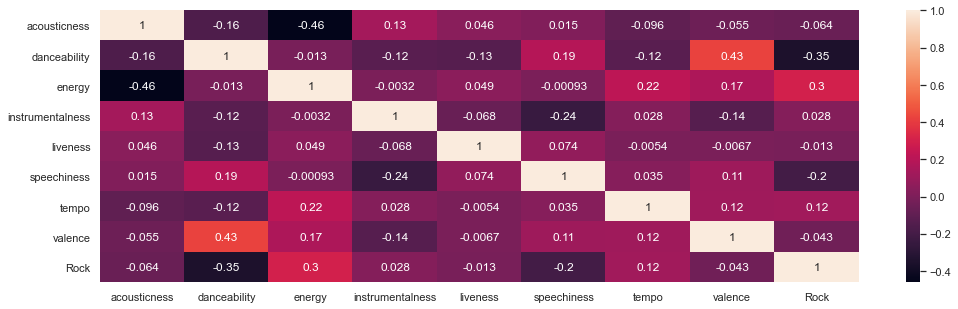

In [10]:
sns.heatmap(tracks_dummies[tracks_features + ['Rock']].corr(), annot=True)

In [11]:
def scatterplot(x1, x2, target):
    # Visualizamos los datos
    y = [int(x) for x in tracks['genre_top'] == target]
    plt.figure(figsize=(10,8))
    sns.scatterplot(x=tracks[x1], y=tracks[x2], data=tracks, hue=y)
    plt.title('Is it ' + target)
    plt.xlabel(x1, fontsize=15)
    plt.ylabel(x2, fontsize=15);

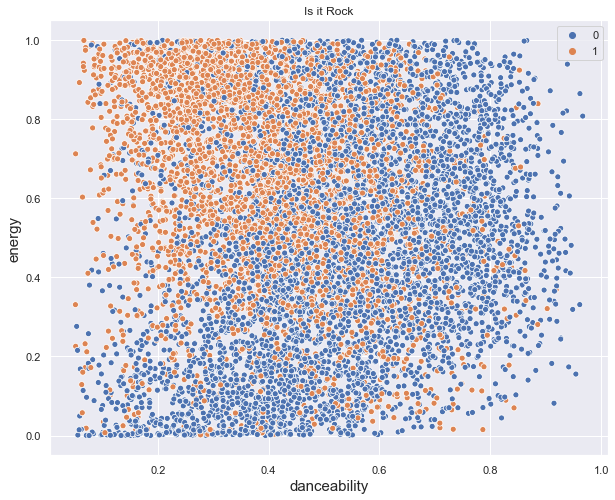

In [12]:
scatterplot('danceability', 'energy', 'Rock')

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tracks_dummies[['danceability', 'energy']], tracks_dummies['Rock'], random_state=0)
print('Hay', y_train.shape[0], 'datos de entrenamiento y', y_test.shape[0], 'datos de testeo')

Hay 6648 datos de entrenamiento y 2216 datos de testeo


Vamos a entrenar con k=5

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [15]:
df_pred = pd.concat([X_test, y_test, pd.Series(y_pred, index=y_test.index), y_test==y_pred], axis=1)
df_pred.columns = ['danceability', 'energy', 'is_rock', 'y_pred', 'pred_ok']
df_pred.sample(5)

,danceability,energy,is_rock,y_pred,pred_ok
track_id,,,,,
18414,0.609805,0.979783,1,0,False
7213,0.264227,0.825526,1,1,True
14721,0.431880,0.441410,1,0,False
1781,0.364172,0.980563,1,1,True
20577,0.270290,0.383563,0,1,False


In [16]:
df_pred['pred_ok'].mean()

0.6962996389891697

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6962996389891697

Ahora vamos a buscar un hiperparametro k adecuado

Primero veremos como cambian las fronteras de decision al cambiar k

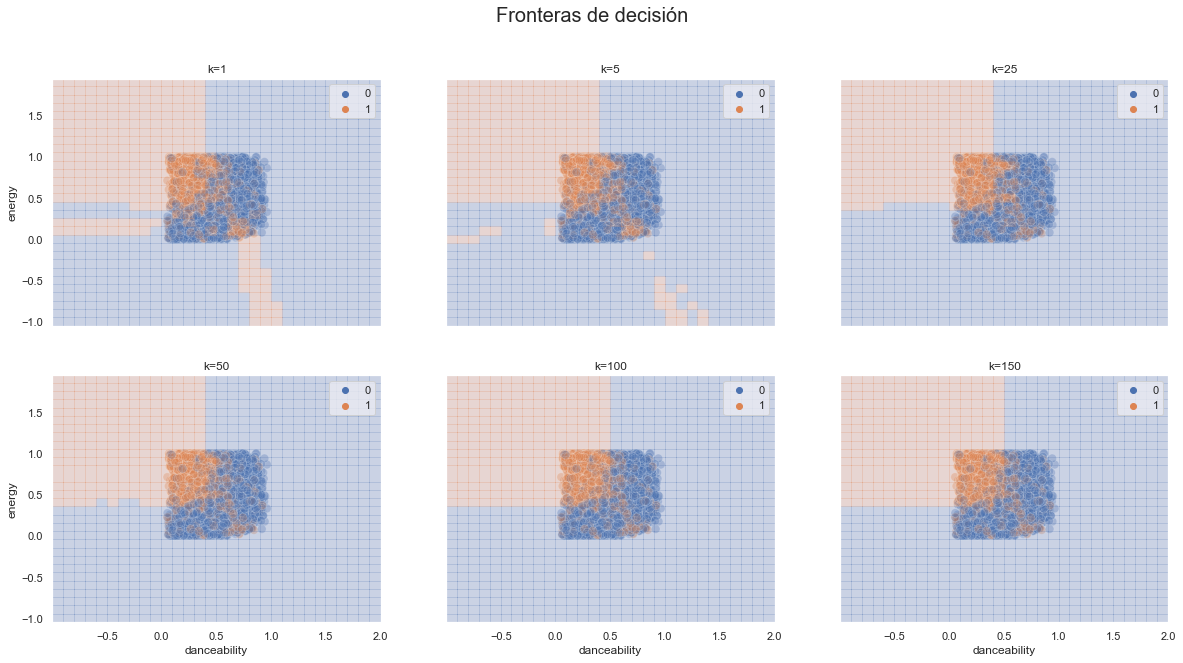

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10), sharex=True, sharey=True)
ax = ax.ravel()
fig.suptitle('Fronteras de decisión', fontsize=20)

# Iteramos sobre distintos valores de k
for i, k in enumerate([1, 5, 25, 50, 100, 150]):
    # Visualizamos los datos de entrenamiento
    sns.scatterplot(x=X_train['danceability'], y=X_train['energy'], hue=y_train.tolist(), alpha=0.3, s=75, ax=ax[i])
    
    # Definimos una grilla de valores que abarcan todo el rango de cada variable
    x1_min, x1_max = X_train['danceability'].min() - 1, X_train['danceability'].max() + 1
    x2_min, x2_max = X_train['energy'].min() - 1, X_train['energy'].max() + 1
    danceability, energy = np.meshgrid(np.arange(x1_min, x1_max, .1), np.arange(x2_min, x2_max, .1))

    # Instanciamos y entrenamos un KNN con n_neighbors=k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predecimos a partir de los valores de la grilla
    Z = knn.predict(np.c_[danceability.ravel(), energy.ravel()])
    Z = Z.reshape(danceability.shape)

    # Representamos las áreas de influencia de cada clase
    ax[i].pcolormesh(danceability, energy, Z, cmap=ListedColormap(sns.color_palette(n_colors=2)), alpha=0.2, shading='auto')
    ax[i].set_title(f'k={k}')
    ax[i].set_xlabel(f'danceability')
    ax[i].set_ylabel(f'energy')

In [19]:
# Vamos a querer graficar los distintos valores del score de cross validation
# en función del hiperparámetro n_neighbors. Para esto generamos una lista de
# diccionarios que después se puede convertir fácilmente en DataFrame.

# Probamos todos los enteros desde el 1 hasta el 20
# como posibles valores de n_neighbors a explorar.

# Definimos la estrategia de validación cruzada

from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits= 5, # Number of folds, must be at least 2
          shuffle= True, # Whether to shuffle the data before splitting into batches.
          random_state= 12) # When shuffle is True, random_state affects the ordering of the indices, which controls the randomness of each fold.



def knn_train(max_n, X_train, y_train):
    scores_df = []
    for i in range(1, max_n):
        model = KNeighborsClassifier(n_neighbors= i)

        # cross_val_scores nos devuelve un array de 5 resultados,
        # uno por cada partición que hizo automáticamente CV
        cv_scores = cross_val_score(model, X_train, y_train, cv=kf)

        dict_row_score = {'score_medio':np.mean(cv_scores),
                          'score_std':np.std(cv_scores), 'n_neighbors':i}

        # Guardamos cada uno en la lista de diccionarios
        scores_df.append(dict_row_score)
    
    print("Sample de scores: ")
    display(pd.DataFrame(scores_df).sample(5))
    
    df_scores = pd.DataFrame(scores_df)
    plt.plot(df_scores['n_neighbors'], df_scores['score_medio'])
    plt.title(f'Variacion de accuracy con k')
    plt.xlabel(f'Valor k')
    plt.ylabel(f'Score medio')
    plt.show()
        
    score_max = df_scores.score_medio.max()
    print("Score maximo: ")
    display(df_scores[df_scores.score_medio == score_max])
    
    return df_scores[df_scores.score_medio == score_max]['n_neighbors']
    

Sample de scores: 


,score_medio,score_std,n_neighbors
11,0.722324,0.005273,12
7,0.711492,0.002066,8
14,0.727437,0.006243,15
12,0.721270,0.006601,13
10,0.717510,0.004601,11


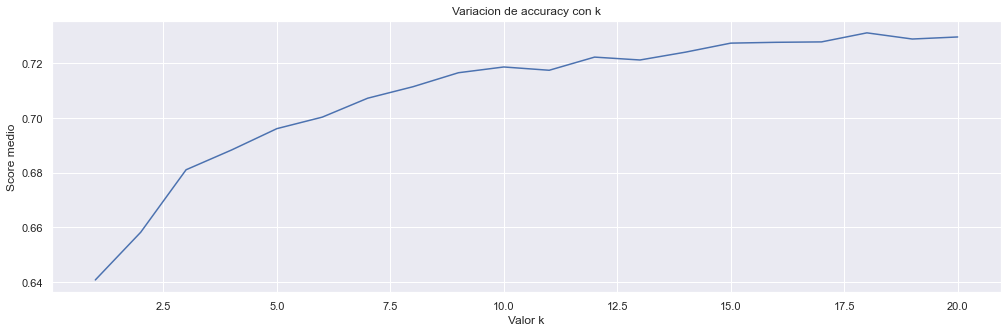

Score maximo: 


,score_medio,score_std,n_neighbors
17,0.731197,0.00615,18


In [20]:
k = knn_train(21, X_train, y_train)

In [21]:
int(k.values)

18

### KNN con Estandarizacion de features

Estandarizar las variables para eliminar sus distintas unidades de medida y evitar distorsiones debidas a diversas escalas

Sample de scores: 


,score_medio,score_std,n_neighbors
2,0.684118,0.008167,3
15,0.724429,0.003711,16
1,0.658542,0.006821,2
18,0.725783,0.005730,19
5,0.703821,0.003853,6


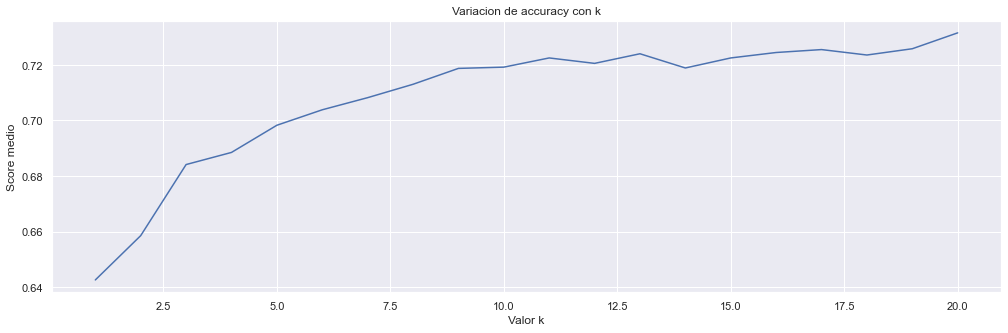

Score maximo: 


,score_medio,score_std,n_neighbors
19,0.7315,0.00692,20


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

best_k = knn_train(21, X_train_scaled, y_train)

In [26]:
model = KNeighborsClassifier(n_neighbors=best_k.values[0])
model.fit(X_train_scaled, y_train)

accuracy_score(y_train, model.predict(X_train_scaled)).round(2)

0.75

In [ ]:
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

## Entrenamiento con mfcc
MFCC: Mel Frequency Cepstral Coefficient
(MFCC), used for for identifying the linguistic content and discarding all the other stuff which carries information like background noise, emotion etc. Usually this related to the musical instrument.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x['mfcc'], y, random_state=0)
print('Hay', y_train.shape[0], 'datos de entrenamiento y', y_test.shape[0], 'datos de testeo')

## Pre-process

In [ ]:
import time
import os

import IPython.display as ipd
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd

from sklearn.utils import shuffle
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder, LabelBinarizer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
from sklearn.model_selection import train_test_split

def pre_process(fset):
    enc = LabelEncoder()

    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

    y_train = enc.fit_transform(y_train)
    y_test = enc.transform(y_test)

    X_train = X_train.loc[fset].as_matrix()
    X_test = X_test.loc[fset].as_matrix()

    X_train, y_train = shuffle(X_train, y_train, random_state=42)

    # Standardize features by removing the mean and scaling to unit variance.
    scaler = StandardScaler(copy=False)
    scaler.fit_transform(X_train)
    scaler.transform(X_test)

    print('Hay', y_train.shape[0], 'datos de entrenamiento y', y_test.shape[0], 'datos de testeo')
    return X_train, X_test, y_train, y_test

In [ ]:
def test_classifiers_features(classifiers, feature_sets, multi_label=False):
    columns = list(classifiers.keys()).insert(0, 'dim')
    scores = pd.DataFrame(columns=columns, index=feature_sets.keys())
    times = pd.DataFrame(columns=classifiers.keys(), index=feature_sets.keys())
    for fset_name, fset in tqdm_notebook(feature_sets.items(), desc='features'):
        X_train, X_test, y_train, y_test = pre_process(fset)
        scores.loc[fset_name, 'dim'] = X_train.shape[1]
        for clf_name, clf in classifiers.items():
            t = time.process_time()
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            scores.loc[fset_name, clf_name] = score
            times.loc[fset_name, clf_name] = time.process_time() - t
    return scores, times


In [ ]:
def format_scores(scores):
    def highlight(s):
        is_max = s == max(s[1:])
        return ['background-color: yellow' if v else '' for v in is_max]
    scores = scores.style.apply(highlight, axis=1)
    return scores.format('{:.2%}', subset=pd.IndexSlice[:, scores.columns[1]:])

In [ ]:
classifiers = {
    'LR': LogisticRegression(),
    'kNN': KNeighborsClassifier(n_neighbors=200),
    'SVCrbf': SVC(kernel='rbf'),
    'SVCpoly1': SVC(kernel='poly', degree=1),
    'linSVC1': SVC(kernel="linear"),
    'linSVC2': LinearSVC(),
    #GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    'DT': DecisionTreeClassifier(max_depth=5),
    'RF': RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    'AdaBoost': AdaBoostClassifier(n_estimators=10),
    'MLP1': MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000),
    'MLP2': MLPClassifier(hidden_layer_sizes=(200, 50), max_iter=2000),
    'NB': GaussianNB(),
    'QDA': QuadraticDiscriminantAnalysis(),
}

feature_sets = {
#    'echonest_audio': ('echonest', 'audio_features'),
#    'echonest_social': ('echonest', 'social_features'),
#    'echonest_temporal': ('echonest', 'temporal_features'),
#    'echonest_audio/social': ('echonest', ('audio_features', 'social_features')),
#    'echonest_all': ('echonest', ('audio_features', 'social_features', 'temporal_features')),
}
for name in features.columns.levels[0]:
    feature_sets[name] = name
    
feature_sets.update({
    'mfcc/contrast': ['mfcc', 'spectral_contrast'],
    'mfcc/contrast/chroma': ['mfcc', 'spectral_contrast', 'chroma_cens'],
    'mfcc/contrast/centroid': ['mfcc', 'spectral_contrast', 'spectral_centroid'],
    'mfcc/contrast/chroma/centroid': ['mfcc', 'spectral_contrast', 'chroma_cens', 'spectral_centroid'],
    'mfcc/contrast/chroma/centroid/tonnetz': ['mfcc', 'spectral_contrast', 'chroma_cens', 'spectral_centroid', 'tonnetz'],
    'mfcc/contrast/chroma/centroid/zcr': ['mfcc', 'spectral_contrast', 'chroma_cens', 'spectral_centroid', 'zcr'],
    'all_non-echonest': list(features.columns.levels[0])
})

In [ ]:
scores, times = test_classifiers_features(classifiers, feature_sets)

#ipd.display(format_scores(scores))
#ipd.display(times.style.format('{:.4f}'))